In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
file_path = "spotify-2023.csv"
spotify_data = pd.read_csv(file_path, encoding='latin1') # or encoding='ISO-8859-1'

In [57]:
spotify_data.shape

(817, 24)

In [58]:
spotify_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,1,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,1,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,1,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,1,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,0,65,23,80,14,63,11,6


In [5]:
# Check for null values
print("Null values before removal:\n", spotify_data.isnull().sum())

Null values before removal:
 track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [6]:
# Remove null values
spotify_data.dropna(inplace=True)

In [7]:
# Check for null values after removal
print("Null values after removal:\n", spotify_data.isnull().sum())

Null values after removal:
 track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64


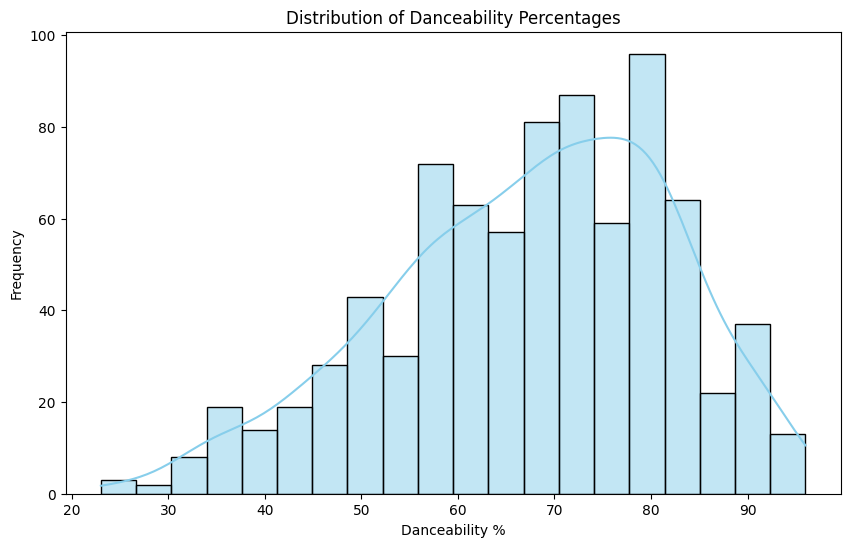

In [19]:
# 1. Univariate Graph - Histogram of danceability percentages
# Question 1: What is the distribution of danceability percentages?
plt.figure(figsize=(10, 6))
sns.histplot(spotify_data['danceability_%'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Danceability Percentages')
plt.xlabel('Danceability %')
plt.ylabel('Frequency')
plt.show()

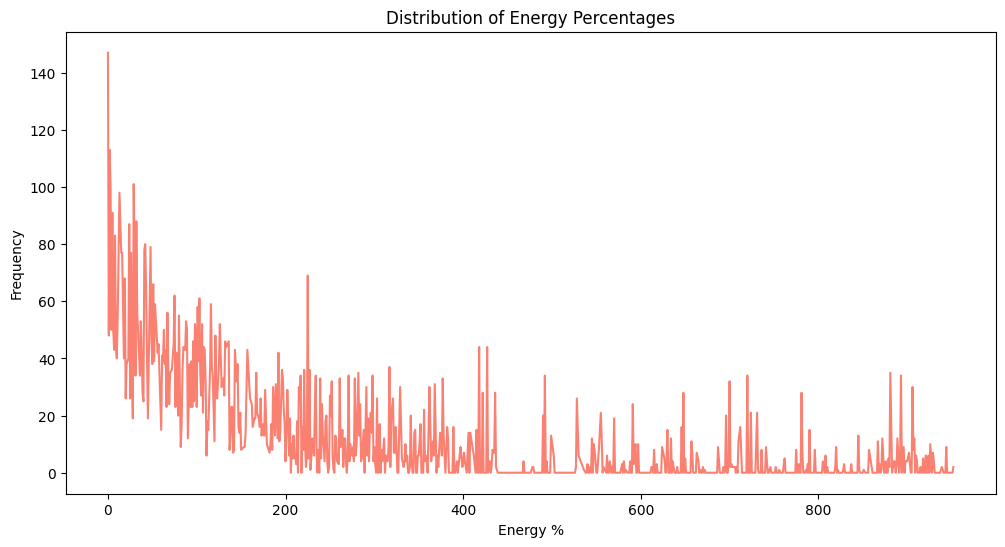

In [55]:
# Question 2: How are energy percentages distributed? spotify charts
plt.figure(figsize=(12, 6))
sns.lineplot(spotify_data['in_spotify_charts'],color='salmon')
plt.title('Distribution of Energy Percentages')
plt.xlabel('Energy %')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x600 with 0 Axes>

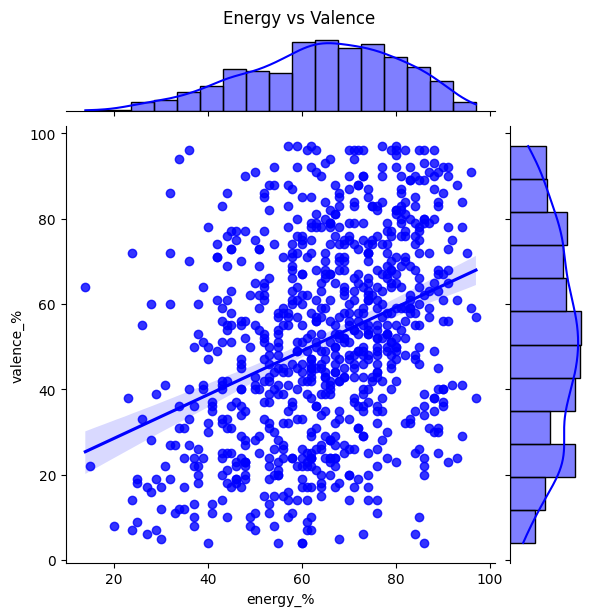

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Joint plot with regression line
plt.figure(figsize=(10, 6))
sns.jointplot(x='energy_%', y='valence_%', data=spotify_data, kind='reg', color='blue')
plt.suptitle('Energy vs Valence', y=1.02)
plt.show()


<Figure size 1000x800 with 0 Axes>

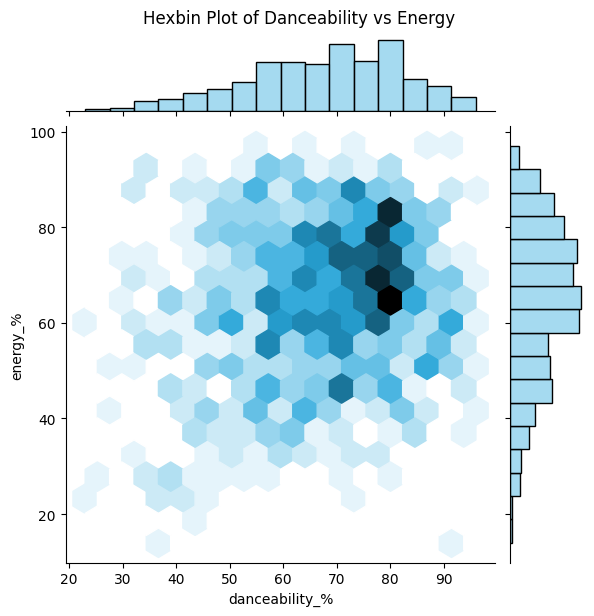

In [23]:
# Question 4: How does danceability correlate with energy?
plt.figure(figsize=(10, 8))
sns.jointplot(x='danceability_%', y='energy_%', data=spotify_data, kind='hex', color='skyblue')
plt.suptitle('Hexbin Plot of Danceability vs Energy', y=1.02)
plt.show()

In [36]:
# Check unique values in 'mode' column
print("Unique values in 'mode' column:", spotify_data['mode'].unique())


Unique values in 'mode' column: ['Major' 'Minor']


In [37]:
# Convert 'mode' to numerical values
spotify_data['mode'] = spotify_data['mode'].map({'Minor': 0, 'Major': 1})

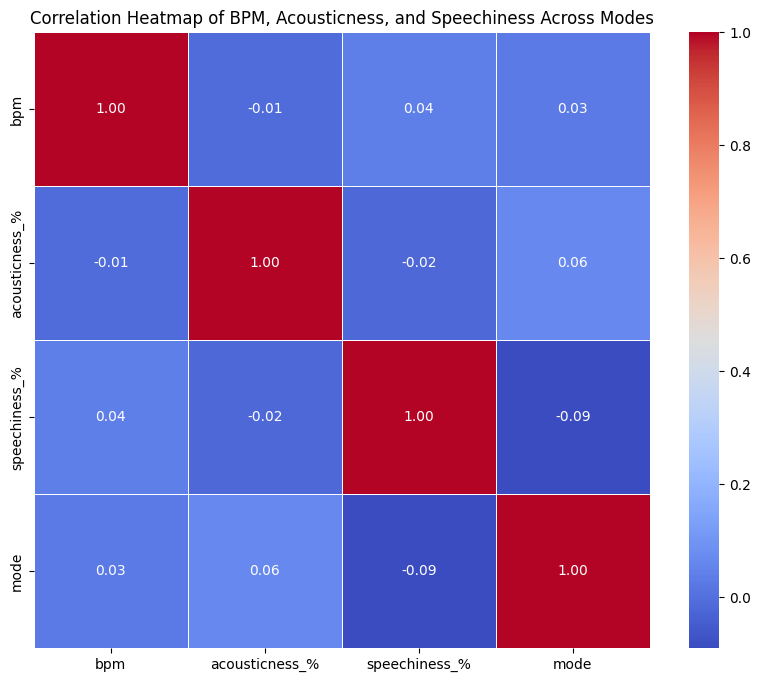

In [40]:
# Question 5: How do BPM, Acousticness, and Speechiness relate across different modes?
multivariate_columns = ['bpm', 'acousticness_%', 'speechiness_%']

# Calculate the correlation matrix
correlation_matrix = spotify_data[multivariate_columns + ['mode']].corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
plt.title('Correlation Heatmap of BPM, Acousticness, and Speechiness Across Modes')
plt.show()

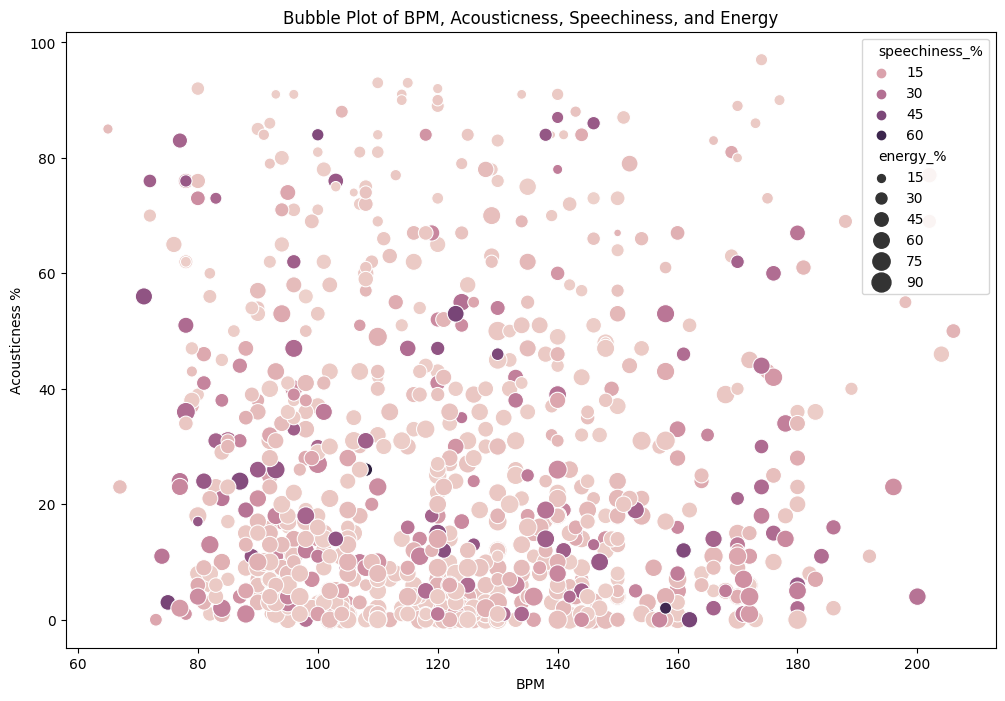

In [41]:
# 3. Multivariate Graphs
# Question 6: Bubble plot of BPM, Acousticness, and Speechiness with Energy as the bubble size
plt.figure(figsize=(12, 8))
sns.scatterplot(x='bpm', y='acousticness_%', hue='speechiness_%', size='energy_%', sizes=(30, 200), data=spotify_data)
plt.title('Bubble Plot of BPM, Acousticness, Speechiness, and Energy')
plt.xlabel('BPM')
plt.ylabel('Acousticness %')
plt.show()
